### Thinking1
逻辑回归的假设条件是怎样的？

答：（1）假设数据服从伯努利分布  
（2）假设sigmoid函数计算所得为正类概率

### Thinking2
逻辑回归的损失函数是怎样的？

答：对似然函数
$$ L(\theta)=\prod_{i=1}^mP(y^{(i)}|x^{(i)}; \theta)=\prod_{i=1}^mh_\theta(x^{(i)})^{y^{(i)}}(1-h_\theta(x^{(i)}))^{1-y^{(i)}}$$
取自然对数后加负号后求平均得到损失函数
$$ J(\theta) = -\frac{1}m\sum_{i=1}^m(y^{(i)}logh_\theta(x^{(i)}) + (1-y^{(i)})log(1-h_\theta(x^{(i)})))$$

其中$$h_\theta(x;\theta)=\frac{1}{1+e^{-\theta^Tx}}$$

### Thinking3
逻辑回归如何进行分类？

答：设定一个阈值（通常为0.5），如果样本的正类概率大于该阈值，则分类为正，反之分类为负。

### Thinking4
为什么在训练中需要将高度相关的特征去掉？

答：（1）高相关特征之间会相互干扰，导致最终学习出来的结果可解释性较差；  
（2）高相关特征之间相互具有较高的可替代性，去掉冗余特征，可以提高模型训练效率。

### Action1
基于评分卡的风控模型开发  
数据集GiveMeSomeCredit，15万样本数据  
https://www.kaggle.com/c/GiveMeSomeCredit/data  
使用WOE进行特征变换，IV进行特征筛选，LR构建风控模型，并对模型评分规则进行可解释性说明   
–基本属性：包括了借款人当时的年龄  
– 偿债能力：包括了借款人的月收入、负债比率  
– 信用往来：两年内35-59天逾期次数、两年内60-89天逾期次  数、两年内90天或高于90天逾期的次数  
– 财产状况：包括了开放式信贷和贷款数量、不动产贷款或额度数量。  
– 其他因素：包括了借款人的家属数量

#### 数据探索

In [11]:
import pandas as pd

# 数据加载
df_train = pd.read_csv('./cs-training.csv')
df_train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [12]:
# 去掉第一列
df_train = df_train.iloc[:,1:]
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64
违约率： 0.06684


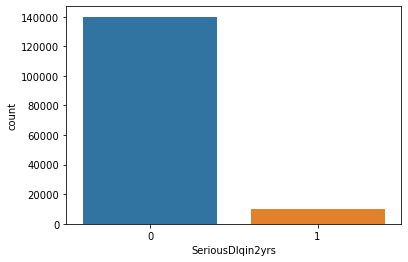

In [34]:
# 查看数据情况
# 标签分布
import matplotlib.pyplot as plt
import seaborn as sns
print(df_train['SeriousDlqin2yrs'].value_counts())
print('违约率：', df_train['SeriousDlqin2yrs'].sum()/len(df_train))
sns.countplot(df_train['SeriousDlqin2yrs'])
plt.show()

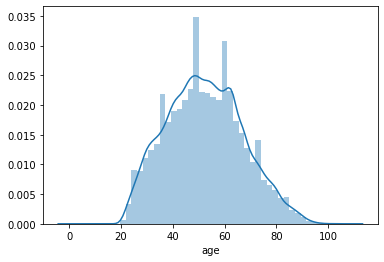

In [46]:
# 年龄分布
sns.distplot(df_train['age'])
plt.show()

In [16]:
# 其他统计信息
df_train.mean()

SeriousDlqin2yrs                           0.066840
RevolvingUtilizationOfUnsecuredLines       6.048438
age                                       52.295207
NumberOfTime30-59DaysPastDueNotWorse       0.421033
DebtRatio                                353.005076
MonthlyIncome                           6670.221237
NumberOfOpenCreditLinesAndLoans            8.452760
NumberOfTimes90DaysLate                    0.265973
NumberRealEstateLoansOrLines               1.018240
NumberOfTime60-89DaysPastDueNotWorse       0.240387
NumberOfDependents                         0.757222
dtype: float64

In [17]:
df_train.median()

SeriousDlqin2yrs                           0.000000
RevolvingUtilizationOfUnsecuredLines       0.154181
age                                       52.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.366508
MonthlyIncome                           5400.000000
NumberOfOpenCreditLinesAndLoans            8.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               1.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
dtype: float64

In [19]:
df_train['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [20]:
df_train['DebtRatio'].describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

In [30]:
df_train[df_train['DebtRatio']>10000]['DebtRatio'].value_counts().sort_index()

10009.0     1
10041.0     1
10046.0     1
10047.0     1
10050.0     1
           ..
168835.0    1
220516.0    1
307001.0    1
326442.0    1
329664.0    1
Name: DebtRatio, Length: 180, dtype: int64

#### 数据预处理

##### 缺失值填充

In [35]:
df_train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [36]:
df_train['MonthlyIncome'].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [37]:
df_train['NumberOfDependents'].describe()

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

In [51]:
# 利用中位数进行填充
df_train = df_train.fillna(df_train.median())
df_train.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

##### 数据分箱

1）对于age字段，分成6段   
[-math.inf, 25, 40, 50, 60, 70, math.inf]  
2）对于NumberOfDependents（家属人数）字段，分成6段  
[-math.inf,2,4,6,8,10,math.inf]  
3）对于3种逾期次数，即NumberOfTime30-59DaysPastDueNotWorse，NumberOfTime60-89DaysPastDueNotWorse，NumberOfTimes90DaysLate，分成10段
[-math.inf,1,2,3,4,5,6,7,8,9,math.inf]  
4）对于其余字段，即RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines 分成5段

In [60]:
# 按人工指定数值分箱
import math
age_bins = [-math.inf, 25, 40, 50, 60, 70, math.inf]
dependent_bins = [-math.inf,2,4,6,8,10,math.inf]
time_bins = [-math.inf,1,2,3,4,5,6,7,8,9,math.inf] 
pd.cut(df_train['age'], bins=age_bins)

0         (40.0, 50.0]
1         (25.0, 40.0]
2         (25.0, 40.0]
3         (25.0, 40.0]
4         (40.0, 50.0]
              ...     
149995     (70.0, inf]
149996    (40.0, 50.0]
149997    (50.0, 60.0]
149998    (25.0, 40.0]
149999    (60.0, 70.0]
Name: age, Length: 150000, dtype: category
Categories (6, interval[float64]): [(-inf, 25.0] < (25.0, 40.0] < (40.0, 50.0] < (50.0, 60.0] < (60.0, 70.0] < (70.0, inf]]

In [61]:
df_train['age_bins'] = pd.cut(df_train['age'], bins=age_bins)
df_train['NumberOfDependents_bins'] = pd.cut(df_train['NumberOfDependents'], bins=dependent_bins)
df_train['NumberOfTime30-59DaysPastDueNotWorse_bins'] = pd.cut(df_train['NumberOfTime30-59DaysPastDueNotWorse'], bins=time_bins)
df_train['NumberOfTime60-89DaysPastDueNotWorse_bins'] = pd.cut(df_train['NumberOfTime60-89DaysPastDueNotWorse'], bins=time_bins)
df_train['NumberOfTimes90DaysLate_bins'] = pd.cut(df_train['NumberOfTimes90DaysLate'], bins=time_bins)

In [66]:
df_train[['age','age_bins','NumberOfDependents','NumberOfDependents_bins']].head()

,age,age_bins,NumberOfDependents,NumberOfDependents_bins
0,45,"(40.0, 50.0]",2.0,"(-inf, 2.0]"
1,40,"(25.0, 40.0]",1.0,"(-inf, 2.0]"
2,38,"(25.0, 40.0]",0.0,"(-inf, 2.0]"
3,30,"(25.0, 40.0]",0.0,"(-inf, 2.0]"
4,49,"(40.0, 50.0]",0.0,"(-inf, 2.0]"


In [67]:
df_train[['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime30-59DaysPastDueNotWorse_bins']].head()

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime30-59DaysPastDueNotWorse_bins
0,2,"(1.0, 2.0]"
1,0,"(-inf, 1.0]"
2,1,"(-inf, 1.0]"
3,0,"(-inf, 1.0]"
4,1,"(-inf, 1.0]"


In [73]:
# 其余按频率分箱，等频分为5段
df_train['RevolvingUtilizationOfUnsecuredLines_bins'] = pd.qcut(df_train['RevolvingUtilizationOfUnsecuredLines'], q=5, duplicates='drop')
df_train['DebtRatio_bins'] = pd.qcut(df_train['DebtRatio'], q=5, duplicates='drop')
df_train['MonthlyIncome_bins'] = pd.qcut(df_train['MonthlyIncome'], q=5, duplicates='drop')
df_train['NumberOfOpenCreditLinesAndLoans_bins'] = pd.qcut(df_train['NumberOfOpenCreditLinesAndLoans'], q=5, duplicates='drop')
df_train['NumberRealEstateLoansOrLines_bins'] = pd.qcut(df_train['NumberRealEstateLoansOrLines'], q=5, duplicates='drop')

In [97]:
# 检查按频率分箱的合理性
print(df_train['RevolvingUtilizationOfUnsecuredLines_bins'].value_counts())
df_train[['RevolvingUtilizationOfUnsecuredLines','RevolvingUtilizationOfUnsecuredLines_bins']].head()

(0.699, 50708.0]    30000
(0.271, 0.699]      30000
(0.0832, 0.271]     30000
(0.0192, 0.0832]    30000
(-0.001, 0.0192]    30000
Name: RevolvingUtilizationOfUnsecuredLines_bins, dtype: int64


,RevolvingUtilizationOfUnsecuredLines,RevolvingUtilizationOfUnsecuredLines_bins
0,0.766127,"(0.699, 50708.0]"
1,0.957151,"(0.699, 50708.0]"
2,0.658180,"(0.271, 0.699]"
3,0.233810,"(0.0832, 0.271]"
4,0.907239,"(0.699, 50708.0]"


In [94]:
print(df_train['DebtRatio_bins'].value_counts())
df_train[['DebtRatio','DebtRatio_bins']].head()

(0.468, 4.0]       30109
(0.287, 0.468]     30000
(0.134, 0.287]     30000
(-0.001, 0.134]    30000
(4.0, 329664.0]    29891
Name: DebtRatio_bins, dtype: int64


,DebtRatio,DebtRatio_bins
0,0.802982,"(0.468, 4.0]"
1,0.121876,"(-0.001, 0.134]"
2,0.085113,"(-0.001, 0.134]"
3,0.036050,"(-0.001, 0.134]"
4,0.024926,"(-0.001, 0.134]"


In [95]:
print(df_train['MonthlyIncome_bins'].value_counts())
df_train[['MonthlyIncome','MonthlyIncome_bins']].head() # drop合并后实际不一定划分为5段

(3400.0, 5400.0]       59757
(-0.001, 3400.0]       30289
(8250.0, 3008750.0]    29993
(5400.0, 8250.0]       29961
Name: MonthlyIncome_bins, dtype: int64


,MonthlyIncome,MonthlyIncome_bins
0,9120.0,"(8250.0, 3008750.0]"
1,2600.0,"(-0.001, 3400.0]"
2,3042.0,"(-0.001, 3400.0]"
3,3300.0,"(-0.001, 3400.0]"
4,63588.0,"(8250.0, 3008750.0]"


In [96]:
print(df_train[(df_train['MonthlyIncome']>3400.0)&(df_train['MonthlyIncome']<=5400.0)]['MonthlyIncome'].value_counts().sum())

59757


In [98]:
print(df_train['NumberOfOpenCreditLinesAndLoans_bins'].value_counts())
df_train[['NumberOfOpenCreditLinesAndLoans','NumberOfOpenCreditLinesAndLoans_bins']].head()

(6.0, 9.0]       37162
(-0.001, 4.0]    33659
(12.0, 58.0]     27684
(4.0, 6.0]       26545
(9.0, 12.0]      24950
Name: NumberOfOpenCreditLinesAndLoans_bins, dtype: int64


,NumberOfOpenCreditLinesAndLoans,NumberOfOpenCreditLinesAndLoans_bins
0,13,"(12.0, 58.0]"
1,4,"(-0.001, 4.0]"
2,2,"(-0.001, 4.0]"
3,5,"(4.0, 6.0]"
4,7,"(6.0, 9.0]"


In [99]:
print(df_train['NumberRealEstateLoansOrLines_bins'].value_counts())
df_train[['NumberRealEstateLoansOrLines','NumberRealEstateLoansOrLines_bins']].head()

(-0.001, 1.0]    108526
(1.0, 2.0]        31522
(2.0, 54.0]        9952
Name: NumberRealEstateLoansOrLines_bins, dtype: int64


,NumberRealEstateLoansOrLines,NumberRealEstateLoansOrLines_bins
0,6,"(2.0, 54.0]"
1,0,"(-0.001, 1.0]"
2,0,"(-0.001, 1.0]"
3,0,"(-0.001, 1.0]"
4,1,"(-0.001, 1.0]"


In [100]:
df_train['NumberRealEstateLoansOrLines'].value_counts()

0     56188
1     52338
2     31522
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
14        7
15        7
16        4
17        4
25        3
18        2
19        2
20        2
23        2
32        1
21        1
26        1
29        1
54        1
Name: NumberRealEstateLoansOrLines, dtype: int64

In [103]:
# 分箱不太合理，进行调整
loan_bins = [-math.inf, 0, 1, 2, math.inf]
df_train['NumberRealEstateLoansOrLines_bins'] = pd.cut(df_train['NumberRealEstateLoansOrLines'], bins=loan_bins)
print(df_train['NumberRealEstateLoansOrLines_bins'].value_counts())
df_train[['NumberRealEstateLoansOrLines','NumberRealEstateLoansOrLines_bins']].head()

(-inf, 0.0]    56188
(0.0, 1.0]     52338
(1.0, 2.0]     31522
(2.0, inf]      9952
Name: NumberRealEstateLoansOrLines_bins, dtype: int64


,NumberRealEstateLoansOrLines,NumberRealEstateLoansOrLines_bins
0,6,"(2.0, inf]"
1,0,"(-inf, 0.0]"
2,0,"(-inf, 0.0]"
3,0,"(-inf, 0.0]"
4,1,"(0.0, 1.0]"


In [81]:
# 统计分箱字段
bin_cols = [c for c in df_train.columns if c.endswith('bins')]
bin_cols

['age_bins',
 'NumberOfDependents_bins',
 'NumberOfTime30-59DaysPastDueNotWorse_bins',
 'NumberOfTime60-89DaysPastDueNotWorse_bins',
 'NumberOfTimes90DaysLate_bins',
 'RevolvingUtilizationOfUnsecuredLines_bins',
 'DebtRatio_bins',
 'MonthlyIncome_bins',
 'NumberOfOpenCreditLinesAndLoans_bins',
 'NumberRealEstateLoansOrLines_bins']

##### 计算IV值

In [217]:
import numpy as np

def get_iv(df, feature, target):
    data = df.copy()
    temp = data.groupby(feature).agg({target:['sum', 'count']})
    temp.columns = ['bad', 'all']
    temp['good'] = temp['all'] - temp['bad']
    temp['margin_good'] = temp['good']/temp['good'].sum()
    temp['margin_bad'] = temp['bad']/temp['bad'].sum()
#     temp['woe'] = np.log1p(temp['margin_bad']/temp['margin_good'])
    for index, row in temp.iterrows():
        if row['margin_bad'] == 0 or row['margin_bad'] == 1:
            temp.loc[index,'woe'] = np.log(((row['bad']+0.5)/(row['good']+0.5))/(temp['bad'].sum()/temp['good'].sum()))
        else:
            temp.loc[index,'woe'] = np.log(row['margin_bad']/row['margin_good'])
    temp['iv'] = (temp['margin_bad']-temp['margin_good'])*temp['woe']
#     print(temp)
    return temp['iv'].sum()

iv = get_iv(df_train, 'age_bins', 'SeriousDlqin2yrs')
iv        

0.24041120302785984

##### 特征筛选及编码

In [224]:
IV = {}
for feature in bin_cols:
    iv = get_iv(df_train, feature, 'SeriousDlqin2yrs')
    IV[feature] = iv
df_iv = pd.Series(IV).sort_values()
df_iv

NumberOfDependents_bins                      0.014522
NumberOfOpenCreditLinesAndLoans_bins         0.048023
NumberRealEstateLoansOrLines_bins            0.055354
MonthlyIncome_bins                           0.056234
DebtRatio_bins                               0.059488
age_bins                                     0.240411
NumberOfTime60-89DaysPastDueNotWorse_bins    0.266547
NumberOfTimes90DaysLate_bins                 0.491607
NumberOfTime30-59DaysPastDueNotWorse_bins    0.492445
RevolvingUtilizationOfUnsecuredLines_bins    1.059619
dtype: float64

In [291]:
feat_cols = [c for c in df_iv.index if df_iv[c] >= 0.1]
feat_cols

['age_bins',
 'NumberOfTime60-89DaysPastDueNotWorse_bins',
 'NumberOfTimes90DaysLate_bins',
 'NumberOfTime30-59DaysPastDueNotWorse_bins',
 'RevolvingUtilizationOfUnsecuredLines_bins']

In [500]:
def woe_encoder(df, features, target):
    data = df.copy()
    for feature in features:
        temp = df.groupby(feature).agg({target:['sum', 'count']})
        temp.columns = ['bad', 'all']
        temp['good'] = temp['all'] - temp['bad']
        temp['margin_good'] = temp['good']/temp['good'].sum()
        temp['margin_bad'] = temp['bad']/temp['bad'].sum()
    #     temp['woe'] = np.log1p(temp['margin_bad']/temp['margin_good'])
        for index, row in temp.iterrows():
            if row['margin_bad'] == 0 or row['margin_bad'] == 1:
                temp.loc[index,'woe'] = np.log(((row['bad']+0.5)/(row['good']+0.5))/(temp['bad'].sum()/temp['good'].sum()))
            else:
                temp.loc[index,'woe'] = np.log(row['margin_bad']/row['margin_good'])
        temp['iv'] = (temp['margin_bad']-temp['margin_good'])*temp['woe']
        temp.rename(columns={'woe':'woe_'+feature}, inplace=True)
        df_woe = temp.loc[:,'woe_'+feature]
        data = data.merge(df_woe, on=feature, how='left')
    return data

df_woe = woe_encoder(df_train, feat_cols, 'SeriousDlqin2yrs')
df_woe          

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,RevolvingUtilizationOfUnsecuredLines_bins,DebtRatio_bins,MonthlyIncome_bins,NumberOfOpenCreditLinesAndLoans_bins,NumberRealEstateLoansOrLines_bins,woe_age_bins,woe_NumberOfTime60-89DaysPastDueNotWorse_bins,woe_NumberOfTimes90DaysLate_bins,woe_NumberOfTime30-59DaysPastDueNotWorse_bins,woe_RevolvingUtilizationOfUnsecuredLines_bins
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,"(0.699, 50708.0]","(0.468, 4.0]","(8250.0, 3008750.0]","(12.0, 58.0]","(2.0, inf]",0.228343,-0.09799,-0.176674,1.616726,1.242254
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,"(0.699, 50708.0]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-inf, 0.0]",0.469547,-0.09799,-0.176674,-0.257826,1.242254
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,"(0.271, 0.699]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-inf, 0.0]",0.469547,-0.09799,-0.176674,-0.257826,0.053164
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,"(0.0832, 0.271]","(-0.001, 0.134]","(-0.001, 3400.0]","(4.0, 6.0]","(-inf, 0.0]",0.469547,-0.09799,-0.176674,-0.257826,-0.866502
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,"(0.699, 50708.0]","(-0.001, 0.134]","(8250.0, 3008750.0]","(6.0, 9.0]","(0.0, 1.0]",0.228343,-0.09799,-0.176674,-0.257826,1.242254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,...,"(0.0192, 0.0832]","(0.134, 0.287]","(-0.001, 3400.0]","(-0.001, 4.0]","(0.0, 1.0]",-1.132145,-0.09799,-0.176674,-0.257826,-1.447382
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,...,"(0.271, 0.699]","(0.468, 4.0]","(5400.0, 8250.0]","(-0.001, 4.0]","(0.0, 1.0]",0.228343,-0.09799,-0.176674,-0.257826,0.053164
149997,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,...,"(0.0832, 0.271]","(4.0, 329664.0]","(3400.0, 5400.0]","(12.0, 58.0]","(0.0, 1.0]",-0.084782,-0.09799,-0.176674,-0.257826,-0.866502
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,...,"(-0.001, 0.0192]","(-0.001, 0.134]","(5400.0, 8250.0]","(-0.001, 4.0]","(-inf, 0.0]",0.469547,-0.09799,-0.176674,-0.257826,-1.286617


In [309]:
train_data = df_woe[[c for c in df_woe.columns if 'woe' in c]]
target = df_woe['SeriousDlqin2yrs']

In [310]:
# 得到WOE规则
df_rule = pd.DataFrame(columns=['feature', 'bin', 'woe'])
for feature in feat_cols:
    woe_feat = 'woe_' + feature
    temp = df_woe[[feature, woe_feat]].drop_duplicates().sort_values(feature)
    temp.columns = ['bin', 'woe']
    temp['feature'] = feature
    df_rule = pd.concat([df_rule, temp])
df_rule.set_index('feature')

,bin,woe
feature,,
age_bins,"(-inf, 25.0]",0.562024
age_bins,"(25.0, 40.0]",0.469547
age_bins,"(40.0, 50.0]",0.228343
age_bins,"(50.0, 60.0]",-0.084782
age_bins,"(60.0, 70.0]",-0.689003
age_bins,"(70.0, inf]",-1.132145
NumberOfTime60-89DaysPastDueNotWorse_bins,"(-inf, 1.0]",-0.097990
NumberOfTime60-89DaysPastDueNotWorse_bins,"(1.0, 2.0]",2.643431
NumberOfTime60-89DaysPastDueNotWorse_bins,"(2.0, 3.0]",2.901978


#### 模型训练

In [311]:
# 训练集切分
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(train_data, target, test_size=0.2, random_state=33)

In [312]:
# 模型训练
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
lr = LogisticRegression(random_state=33).fit(train_x, train_y)
pred_y = lr.predict(test_x)
acc = accuracy_score(pred_y, test_y)
roc = roc_auc_score(pred_y, test_y)
print(acc,roc)

0.9364 0.7802441700808936


#### 生成评分卡

$$ P_0 = A - B*ln(Odds_0) $$
$$ P_0 - PDO = A - B*ln(2Odds_0) $$

In [321]:
# 设Odds0=1，P_0 = 300，PDO=50
Odds = 1
P = 300
PDO = 50
B = PDO/np.log(2)
A = P + B*np.log(Odds)
A,B

(300.0, 72.13475204444818)

In [322]:
lr.coef_

array([[0.48509094, 0.34844058, 0.55609196, 0.59817103, 0.76286684]])

In [343]:
def generate_score_card(model_coef, features, woe_rule):
    coef = model_coef[0]
    cols = ['variable', 'bin', 'score']
    rule_list = []
    for i in range(len(features)):
        bins  = woe_rule[woe_rule['feature']==features[i]]
        for index, row in bins.iterrows():
            score = int(round(-B*coef[i]*row['woe']))
            rule_list.append([features[i], row['bin'], score])
    card = pd.DataFrame(rule_list, columns=cols)
    return card
score_card = generate_score_card(lr.coef_, feat_cols, df_rule)  
score_card

,variable,bin,score
0,age_bins,"(-inf, 25.0]",-20
1,age_bins,"(25.0, 40.0]",-16
2,age_bins,"(40.0, 50.0]",-8
3,age_bins,"(50.0, 60.0]",3
4,age_bins,"(60.0, 70.0]",24
5,age_bins,"(70.0, inf]",40
6,NumberOfTime60-89DaysPastDueNotWorse_bins,"(-inf, 1.0]",2
7,NumberOfTime60-89DaysPastDueNotWorse_bins,"(1.0, 2.0]",-66
8,NumberOfTime60-89DaysPastDueNotWorse_bins,"(2.0, 3.0]",-73
9,NumberOfTime60-89DaysPastDueNotWorse_bins,"(3.0, 4.0]",-78


In [345]:
score_card.groupby('variable').apply(lambda x: x.sort_values('score', ascending=False))

variable  \
variable                                                                                  
NumberOfTime30-59DaysPastDueNotWorse_bins 26  NumberOfTime30-59DaysPastDueNotWorse_bins   
                                          27  NumberOfTime30-59DaysPastDueNotWorse_bins   
                                          33  NumberOfTime30-59DaysPastDueNotWorse_bins   
                                          34  NumberOfTime30-59DaysPastDueNotWorse_bins   
                                          28  NumberOfTime30-59DaysPastDueNotWorse_bins   
                                          29  NumberOfTime30-59DaysPastDueNotWorse_bins   
                                          30  NumberOfTime30-59DaysPastDueNotWorse_bins   
                                          32  NumberOfTime30-59DaysPastDueNotWorse_bins   
                                          31  NumberOfTime30-59DaysPastDueNotWorse_bins   
                                          35  NumberOfTime30-59DaysPastDueNotWorse_bins   
NumberOfTime60-89DaysPastDueNotWorse_bins 6   NumberOfTime60-89DaysPastDueNotWorse_bins   
                                          14  NumberOfTime60-89DaysPastDueNotWorse_bins   
                                          7   NumberOfTime60-89DaysPastDueNotWorse_bins   
                                          13  NumberOfTime60-89DaysPastDueNotWorse_bins   
                                          15  NumberOfTime60-89DaysPastDueNotWorse_bins   
                                          12  NumberOfTime60-89DaysPastDueNotWorse_bins   
                                          8   NumberOfTime60-89DaysPastDueNotWorse_bins   
                                          9   NumberOfTime60-89DaysPastDueNotWorse_bins   
                                          10  NumberOfTime60-89DaysPastDueNotWorse_bins   
                                          11  NumberOfTime60-89DaysPastDueNotWorse_bins   
NumberOfTimes90DaysLate_bins              16               NumberOfTimes90DaysLate_bins   
                                          17               NumberOfTimes90DaysLate_bins   
                                          25               NumberOfTimes90DaysLate_bins   
                                          18               NumberOfTimes90DaysLate_bins   
                                          21               NumberOfTimes90DaysLate_bins   
                                          20               NumberOfTimes90DaysLate_bins   
                                          19               NumberOfTimes90DaysLate_bins   
                                          23               NumberOfTimes90DaysLate_bins   
                                          24               NumberOfTimes90DaysLate_bins   
                                          22               NumberOfTimes90DaysLate_bins   
RevolvingUtilizationOfUnsecuredLines_bins 37  RevolvingUtilizationOfUnsecuredLines_bins   
                                          36  RevolvingUtilizationOfUnsecuredLines_bins   
                                          38  RevolvingUtilizationOfUnsecuredLines_bins   
                                          39  RevolvingUtilizationOfUnsecuredLines_bins   
                                          40  RevolvingUtilizationOfUnsecuredLines_bins   
age_bins                                  5                                    age_bins   
                                          4                                    age_bins   
                                          3                                    age_bins   
                                          2                                    age_bins   
                                          1                                    age_bins   
                                          0                                    age_bins   

                                                           bin  score  
variable                                                               
NumberOfTime30-59Days

#### 对用户进行评分

##### 对于训练集中的用户全体

In [382]:
df_score = df_train.copy()

In [383]:
for feature in feat_cols:
    card = score_card[score_card['variable']==feature].iloc[:,1:]
    card.columns = [feature, feature+'_score']
    df_score = df_score.merge(card, on=feature)
df_score

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,RevolvingUtilizationOfUnsecuredLines_bins,DebtRatio_bins,MonthlyIncome_bins,NumberOfOpenCreditLinesAndLoans_bins,NumberRealEstateLoansOrLines_bins,age_bins_score,NumberOfTime60-89DaysPastDueNotWorse_bins_score,NumberOfTimes90DaysLate_bins_score,NumberOfTime30-59DaysPastDueNotWorse_bins_score,RevolvingUtilizationOfUnsecuredLines_bins_score
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,"(0.699, 50708.0]","(0.468, 4.0]","(8250.0, 3008750.0]","(12.0, 58.0]","(2.0, inf]",-8,2,7,-70,-68
1,0,1.000000,50,2,1208.000000,5400.0,4,0,1,0,...,"(0.699, 50708.0]","(4.0, 329664.0]","(3400.0, 5400.0]","(-0.001, 4.0]","(0.0, 1.0]",-8,2,7,-70,-68
2,0,0.732661,44,2,0.140420,9200.0,15,0,1,0,...,"(0.699, 50708.0]","(0.134, 0.287]","(8250.0, 3008750.0]","(12.0, 58.0]","(0.0, 1.0]",-8,2,7,-70,-68
3,1,0.733885,49,2,0.369224,8785.0,20,0,2,0,...,"(0.699, 50708.0]","(0.287, 0.468]","(8250.0, 3008750.0]","(12.0, 58.0]","(1.0, 2.0]",-8,2,7,-70,-68
4,0,0.954396,45,2,0.484214,8836.0,10,0,1,0,...,"(0.699, 50708.0]","(0.468, 4.0]","(8250.0, 3008750.0]","(9.0, 12.0]","(0.0, 1.0]",-8,2,7,-70,-68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1,0.043636,55,6,0.041264,8166.0,16,0,0,0,...,"(0.0192, 0.0832]","(-0.001, 0.134]","(5400.0, 8250.0]","(12.0, 58.0]","(-inf, 0.0]",3,2,7,-119,80
149996,0,0.056846,50,7,0.477638,5097.0,19,0,1,0,...,"(0.0192, 0.0832]","(0.468, 4.0]","(3400.0, 5400.0]","(12.0, 58.0]","(0.0, 1.0]",-8,2,7,-117,80
149997,0,0.065343,79,7,0.782016,1100.0,12,0,1,0,...,"(0.0192, 0.0832]","(0.468, 4.0]","(-0.001, 3400.0]","(9.0, 12.0]","(0.0, 1.0]",40,2,7,-117,80
149998,0,0.076589,70,7,0.279845,4916.0,13,0,2,0,...,"(0.0192, 0.0832]","(0.134, 0.287]","(3400.0, 5400.0]","(12.0, 58.0]","(1.0, 2.0]",24,2,7,-117,80


In [384]:
score_cols = [c for c in df_score.columns if 'score' in c]
score_cols.append('SeriousDlqin2yrs')
df_score = df_score[score_cols]
df_score['score'] = df_score.apply(lambda x: A+x.sum(), axis=1)
df_score

<ipython-input-384-a0416d14a2da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score['score'] = df_score.apply(lambda x: A+x.sum(), axis=1)


,age_bins_score,NumberOfTime60-89DaysPastDueNotWorse_bins_score,NumberOfTimes90DaysLate_bins_score,NumberOfTime30-59DaysPastDueNotWorse_bins_score,RevolvingUtilizationOfUnsecuredLines_bins_score,SeriousDlqin2yrs,score
0,-8,2,7,-70,-68,1,164.0
1,-8,2,7,-70,-68,0,163.0
2,-8,2,7,-70,-68,0,163.0
3,-8,2,7,-70,-68,1,164.0
4,-8,2,7,-70,-68,0,163.0
...,...,...,...,...,...,...,...
149995,3,2,7,-119,80,1,274.0
149996,-8,2,7,-117,80,0,264.0
149997,40,2,7,-117,80,0,312.0
149998,24,2,7,-117,80,0,296.0


In [390]:
# 违约用户的评分情况
df_bad = df_score[df_score['SeriousDlqin2yrs'] == 1]['score']
df_bad.describe()

count    10026.000000
mean       235.799322
std        106.854643
min       -114.000000
25%        164.000000
50%        245.000000
75%        310.000000
max        441.000000
Name: score, dtype: float64

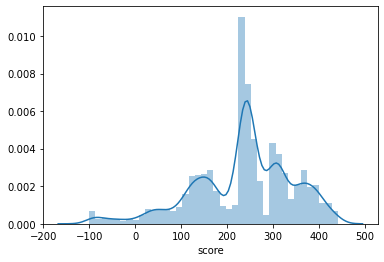

In [392]:
sns.distplot(df_bad)
plt.show()

In [395]:
# 非违约用户的评分情况
df_good = df_score[df_score['SeriousDlqin2yrs'] == 0]['score']
df_good.describe()

count    139974.000000
mean        349.048102
std          70.079128
min         -95.000000
25%         309.000000
50%         371.000000
75%         394.000000
max         440.000000
Name: score, dtype: float64

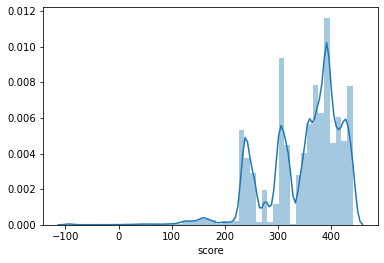

In [396]:
sns.distplot(df_good)
plt.show()

非违约用户的评分整体来说高于违约用户，两者的数据分布也较有区分度，说明评分卡模型的使用具有合理性

##### 对于新用户

In [492]:
def value_to_bin(value, df_bins):
    bins = list(df_bins['bin'])
    for inverval in bins:
        if value in inverval:
            return inverval
        
def values_to_score(df, score_card):
    score = 0
    for variable in score_card['variable'].unique():
        df_bins = score_card[score_card['variable'] == variable]
        feature = variable[:-5]
        value = df[feature] # 从输入apply中的每一行中取值不用再加iloc[0]
        right_bin = value_to_bin(value, df_bins)
        score += df_bins[df_bins['bin'] == right_bin]['score'].iloc[0]
    return score

def get_score(df, score_card, A):
    df['score'] = df.apply(values_to_score, args=(score_card,), axis=1)
    df['score'] += A
    df['score'] = df['score'].astype(int)
    return df

In [426]:
df = pd.read_csv('./cs-training.csv')

In [487]:
users = df.sample(5)
users

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
24508,24509,0,0.264342,45,0,0.491576,7300.0,15,0,2,0,3.0
30444,30445,0,0.046619,40,0,0.777173,7166.0,10,0,4,0,2.0
23589,23590,0,0.000000,83,0,35.000000,NaN,2,0,0,0,NaN
119893,119894,0,0.146366,45,0,0.272364,7500.0,6,0,2,0,3.0
52169,52170,0,0.134836,47,1,0.200213,13150.0,12,1,1,0,1.0


In [493]:
get_score(users, score_card, A)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,score
24508,24509,0,0.264342,45,0,0.491576,7300.0,15,0,2,0,3.0,360
30444,30445,0,0.046619,40,0,0.777173,7166.0,10,0,4,0,2.0,384
23589,23590,0,0.000000,83,0,35.000000,NaN,2,0,0,0,NaN,431
119893,119894,0,0.146366,45,0,0.272364,7500.0,6,0,2,0,3.0,360
52169,52170,0,0.134836,47,1,0.200213,13150.0,12,1,1,0,1.0,360
